# Brainpool Twitter Sentiment Analysis Task

I will be using the Tweepy python package in order to pull relavent tweets which I can use sentiment analysis on. I will be using Auth 2 authentication through twitter as I only need read access and does not need user context.

Below I am importing sys in order to run python commands. This allows me to use pip to install the needed packages.

In [1]:
import sys

!{sys.executable} -m pip install tweepy wordcloud nltk pandas matplotlib --user

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


Below is a list of imports that will be used to perform this task. I will explain each one and how I use it at the time they are run

In [2]:
import re 
import tweepy 
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
nltk.download('punkt')   
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The function cleanText() is used to remove things that will throw off the sentiment analysis such as:
Links
punctuation
stop words - this is a list of words in the wordcloud stopwords package imported above.

In [3]:
def cleanText(text):
    text = text.lower()
    # Remove all mentions
    text = re.sub('http://\S+|https://\S+', '', text)
    # Removes punctuation
    text = re.sub(r'[^\w\s]', '', text)
    #Remove Stop words
    text_tokens = word_tokenize(text)
    text = [word for word in text_tokens if not word in stopwords.words()]
    
    text = ' '.join(text)
    return text

The stem() function stems the tweet. Stemming is a natural language processing technique that lowers inflection in words to their root forms. For instance, the stem of these three words, connections, connected, connects, is “connect”.

The English language has several variants of a single term. The presence of these variances in a text corpus results in data redundancy when developing NLP or machine learning models. Such models may be ineffective.

In [4]:
def stem(text):
    porter = PorterStemmer()
    token_words = word_tokenize(text)
    stem_sentence = []
    for word in token_words:
        stem_sentence.append(porter.stem(word))
    return " ".join(stem_sentence)

The Below function sentiment() analyses the sentiment of a textBlob object and returns 'positive', ' negative' or 'neutral' depending on the score given.

In [5]:
def sentiment(cleaned_text):
    if cleaned_text.sentiment.polarity > 0:
        return 'positive'
    elif cleaned_text.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

The function fetch_tweets() accepts a query(ie. hashtag or search term) as well as a count indicating the number of tweets to return.

It uses the tweepy package and my twitter bearer token to authenticate with twitter. I then loop through the results, sanitise the text and perform sentiment analysis on each one.

Finally I add this to a list of tweets.

In [6]:
def fetch_tweets(query, count = 50):
    

    client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAMpxfgEAAAAAK1o3Y62ITbCY%2BO%2F%2FABV1QoEz7Q4%3D20rQIpmkEhMl5oNLMGt07TdlEyFLwRH1XjR1w5ELjY7J9wzVLq')

    tweets = []

    try:
        fetched_data = client.search_recent_tweets(query=query, tweet_fields=['context_annotations', 'created_at'], max_results=count)

        for tweet in fetched_data.data:
            txt = tweet.text
            clean_txt = cleanText(txt)
            stem_txt = TextBlob(stem(clean_txt))
            sent = sentiment(stem_txt)
            tweets.append((txt, clean_txt, sent))
            print(tweets)
        return tweets
    except tweepy.TweepError as e:
        print("Error : " + str(e))
        exit(1)


This is the main funtionality of the code calling the methods created above to perform the twitter query as well as the sentiment analysis. I then Add this data to a pandas datafram so that I can analyse the results.

Changing the query and rerunning the application will provide different results.

In [7]:
tweets = fetch_tweets(query = '#LoveIsland')

df = pd.DataFrame(tweets, columns= ['tweets', 'clean_tweets','sentiment'])

# Dropping the duplicate values just in case there are some tweets that are copied and then stores the data in a csv file
df = df.drop_duplicates(subset='clean_tweets')
df.to_csv('data.csv', index= False)

[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive')]
[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive'), ('RT @ekinsuindiyah: Murad hosted that LI finale watch party not knowing it would be his retirement party💀… It’s giving last supper #LoveIsla…', 'rt ekinsuindiyah murad hosted finale watch party knowing retirement party giving supper loveisla', 'neutral')]
[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive'), ('RT @ekinsuindiyah: Murad hosted that LI finale watch party not knowing it would be his retirement party💀… It’s giving last 

[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive'), ('RT @ekinsuindiyah: Murad hosted that LI finale watch party not knowing it would be his retirement party💀… It’s giving last supper #LoveIsla…', 'rt ekinsuindiyah murad hosted finale watch party knowing retirement party giving supper loveisla', 'neutral'), ('RT @Nowhey14: Andrew unfollowed Jacques. We stan a supportive boyfriend😌 #loveisland https://t.co/7FD5aM9KOI', 'rt nowhey14 andrew unfollowed jacques stan supportive boyfriend loveisland', 'neutral'), ('Jazmine has shared a worrying update after her time on #LoveIsland \n\nhttps://t.co/jiCKhXFotT', 'jazmine shared worrying update time loveisland', 'neutral'), ('RT @LoveIsland: One Italian stallion, one Turkish delight, so many unforgettable moments… Ekin-Su and Davide are your #LoveIsland 2022 winn…', 'rt loveisland italian stall

[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive'), ('RT @ekinsuindiyah: Murad hosted that LI finale watch party not knowing it would be his retirement party💀… It’s giving last supper #LoveIsla…', 'rt ekinsuindiyah murad hosted finale watch party knowing retirement party giving supper loveisla', 'neutral'), ('RT @Nowhey14: Andrew unfollowed Jacques. We stan a supportive boyfriend😌 #loveisland https://t.co/7FD5aM9KOI', 'rt nowhey14 andrew unfollowed jacques stan supportive boyfriend loveisland', 'neutral'), ('Jazmine has shared a worrying update after her time on #LoveIsland \n\nhttps://t.co/jiCKhXFotT', 'jazmine shared worrying update time loveisland', 'neutral'), ('RT @LoveIsland: One Italian stallion, one Turkish delight, so many unforgettable moments… Ekin-Su and Davide are your #LoveIsland 2022 winn…', 'rt loveisland italian stall

[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive'), ('RT @ekinsuindiyah: Murad hosted that LI finale watch party not knowing it would be his retirement party💀… It’s giving last supper #LoveIsla…', 'rt ekinsuindiyah murad hosted finale watch party knowing retirement party giving supper loveisla', 'neutral'), ('RT @Nowhey14: Andrew unfollowed Jacques. We stan a supportive boyfriend😌 #loveisland https://t.co/7FD5aM9KOI', 'rt nowhey14 andrew unfollowed jacques stan supportive boyfriend loveisland', 'neutral'), ('Jazmine has shared a worrying update after her time on #LoveIsland \n\nhttps://t.co/jiCKhXFotT', 'jazmine shared worrying update time loveisland', 'neutral'), ('RT @LoveIsland: One Italian stallion, one Turkish delight, so many unforgettable moments… Ekin-Su and Davide are your #LoveIsland 2022 winn…', 'rt loveisland italian stall

[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive'), ('RT @ekinsuindiyah: Murad hosted that LI finale watch party not knowing it would be his retirement party💀… It’s giving last supper #LoveIsla…', 'rt ekinsuindiyah murad hosted finale watch party knowing retirement party giving supper loveisla', 'neutral'), ('RT @Nowhey14: Andrew unfollowed Jacques. We stan a supportive boyfriend😌 #loveisland https://t.co/7FD5aM9KOI', 'rt nowhey14 andrew unfollowed jacques stan supportive boyfriend loveisland', 'neutral'), ('Jazmine has shared a worrying update after her time on #LoveIsland \n\nhttps://t.co/jiCKhXFotT', 'jazmine shared worrying update time loveisland', 'neutral'), ('RT @LoveIsland: One Italian stallion, one Turkish delight, so many unforgettable moments… Ekin-Su and Davide are your #LoveIsland 2022 winn…', 'rt loveisland italian stall

[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive'), ('RT @ekinsuindiyah: Murad hosted that LI finale watch party not knowing it would be his retirement party💀… It’s giving last supper #LoveIsla…', 'rt ekinsuindiyah murad hosted finale watch party knowing retirement party giving supper loveisla', 'neutral'), ('RT @Nowhey14: Andrew unfollowed Jacques. We stan a supportive boyfriend😌 #loveisland https://t.co/7FD5aM9KOI', 'rt nowhey14 andrew unfollowed jacques stan supportive boyfriend loveisland', 'neutral'), ('Jazmine has shared a worrying update after her time on #LoveIsland \n\nhttps://t.co/jiCKhXFotT', 'jazmine shared worrying update time loveisland', 'neutral'), ('RT @LoveIsland: One Italian stallion, one Turkish delight, so many unforgettable moments… Ekin-Su and Davide are your #LoveIsland 2022 winn…', 'rt loveisland italian stall

[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive'), ('RT @ekinsuindiyah: Murad hosted that LI finale watch party not knowing it would be his retirement party💀… It’s giving last supper #LoveIsla…', 'rt ekinsuindiyah murad hosted finale watch party knowing retirement party giving supper loveisla', 'neutral'), ('RT @Nowhey14: Andrew unfollowed Jacques. We stan a supportive boyfriend😌 #loveisland https://t.co/7FD5aM9KOI', 'rt nowhey14 andrew unfollowed jacques stan supportive boyfriend loveisland', 'neutral'), ('Jazmine has shared a worrying update after her time on #LoveIsland \n\nhttps://t.co/jiCKhXFotT', 'jazmine shared worrying update time loveisland', 'neutral'), ('RT @LoveIsland: One Italian stallion, one Turkish delight, so many unforgettable moments… Ekin-Su and Davide are your #LoveIsland 2022 winn…', 'rt loveisland italian stall

[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive'), ('RT @ekinsuindiyah: Murad hosted that LI finale watch party not knowing it would be his retirement party💀… It’s giving last supper #LoveIsla…', 'rt ekinsuindiyah murad hosted finale watch party knowing retirement party giving supper loveisla', 'neutral'), ('RT @Nowhey14: Andrew unfollowed Jacques. We stan a supportive boyfriend😌 #loveisland https://t.co/7FD5aM9KOI', 'rt nowhey14 andrew unfollowed jacques stan supportive boyfriend loveisland', 'neutral'), ('Jazmine has shared a worrying update after her time on #LoveIsland \n\nhttps://t.co/jiCKhXFotT', 'jazmine shared worrying update time loveisland', 'neutral'), ('RT @LoveIsland: One Italian stallion, one Turkish delight, so many unforgettable moments… Ekin-Su and Davide are your #LoveIsland 2022 winn…', 'rt loveisland italian stall

[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive'), ('RT @ekinsuindiyah: Murad hosted that LI finale watch party not knowing it would be his retirement party💀… It’s giving last supper #LoveIsla…', 'rt ekinsuindiyah murad hosted finale watch party knowing retirement party giving supper loveisla', 'neutral'), ('RT @Nowhey14: Andrew unfollowed Jacques. We stan a supportive boyfriend😌 #loveisland https://t.co/7FD5aM9KOI', 'rt nowhey14 andrew unfollowed jacques stan supportive boyfriend loveisland', 'neutral'), ('Jazmine has shared a worrying update after her time on #LoveIsland \n\nhttps://t.co/jiCKhXFotT', 'jazmine shared worrying update time loveisland', 'neutral'), ('RT @LoveIsland: One Italian stallion, one Turkish delight, so many unforgettable moments… Ekin-Su and Davide are your #LoveIsland 2022 winn…', 'rt loveisland italian stall

[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive'), ('RT @ekinsuindiyah: Murad hosted that LI finale watch party not knowing it would be his retirement party💀… It’s giving last supper #LoveIsla…', 'rt ekinsuindiyah murad hosted finale watch party knowing retirement party giving supper loveisla', 'neutral'), ('RT @Nowhey14: Andrew unfollowed Jacques. We stan a supportive boyfriend😌 #loveisland https://t.co/7FD5aM9KOI', 'rt nowhey14 andrew unfollowed jacques stan supportive boyfriend loveisland', 'neutral'), ('Jazmine has shared a worrying update after her time on #LoveIsland \n\nhttps://t.co/jiCKhXFotT', 'jazmine shared worrying update time loveisland', 'neutral'), ('RT @LoveIsland: One Italian stallion, one Turkish delight, so many unforgettable moments… Ekin-Su and Davide are your #LoveIsland 2022 winn…', 'rt loveisland italian stall

[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive'), ('RT @ekinsuindiyah: Murad hosted that LI finale watch party not knowing it would be his retirement party💀… It’s giving last supper #LoveIsla…', 'rt ekinsuindiyah murad hosted finale watch party knowing retirement party giving supper loveisla', 'neutral'), ('RT @Nowhey14: Andrew unfollowed Jacques. We stan a supportive boyfriend😌 #loveisland https://t.co/7FD5aM9KOI', 'rt nowhey14 andrew unfollowed jacques stan supportive boyfriend loveisland', 'neutral'), ('Jazmine has shared a worrying update after her time on #LoveIsland \n\nhttps://t.co/jiCKhXFotT', 'jazmine shared worrying update time loveisland', 'neutral'), ('RT @LoveIsland: One Italian stallion, one Turkish delight, so many unforgettable moments… Ekin-Su and Davide are your #LoveIsland 2022 winn…', 'rt loveisland italian stall

[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive'), ('RT @ekinsuindiyah: Murad hosted that LI finale watch party not knowing it would be his retirement party💀… It’s giving last supper #LoveIsla…', 'rt ekinsuindiyah murad hosted finale watch party knowing retirement party giving supper loveisla', 'neutral'), ('RT @Nowhey14: Andrew unfollowed Jacques. We stan a supportive boyfriend😌 #loveisland https://t.co/7FD5aM9KOI', 'rt nowhey14 andrew unfollowed jacques stan supportive boyfriend loveisland', 'neutral'), ('Jazmine has shared a worrying update after her time on #LoveIsland \n\nhttps://t.co/jiCKhXFotT', 'jazmine shared worrying update time loveisland', 'neutral'), ('RT @LoveIsland: One Italian stallion, one Turkish delight, so many unforgettable moments… Ekin-Su and Davide are your #LoveIsland 2022 winn…', 'rt loveisland italian stall

[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive'), ('RT @ekinsuindiyah: Murad hosted that LI finale watch party not knowing it would be his retirement party💀… It’s giving last supper #LoveIsla…', 'rt ekinsuindiyah murad hosted finale watch party knowing retirement party giving supper loveisla', 'neutral'), ('RT @Nowhey14: Andrew unfollowed Jacques. We stan a supportive boyfriend😌 #loveisland https://t.co/7FD5aM9KOI', 'rt nowhey14 andrew unfollowed jacques stan supportive boyfriend loveisland', 'neutral'), ('Jazmine has shared a worrying update after her time on #LoveIsland \n\nhttps://t.co/jiCKhXFotT', 'jazmine shared worrying update time loveisland', 'neutral'), ('RT @LoveIsland: One Italian stallion, one Turkish delight, so many unforgettable moments… Ekin-Su and Davide are your #LoveIsland 2022 winn…', 'rt loveisland italian stall

[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive'), ('RT @ekinsuindiyah: Murad hosted that LI finale watch party not knowing it would be his retirement party💀… It’s giving last supper #LoveIsla…', 'rt ekinsuindiyah murad hosted finale watch party knowing retirement party giving supper loveisla', 'neutral'), ('RT @Nowhey14: Andrew unfollowed Jacques. We stan a supportive boyfriend😌 #loveisland https://t.co/7FD5aM9KOI', 'rt nowhey14 andrew unfollowed jacques stan supportive boyfriend loveisland', 'neutral'), ('Jazmine has shared a worrying update after her time on #LoveIsland \n\nhttps://t.co/jiCKhXFotT', 'jazmine shared worrying update time loveisland', 'neutral'), ('RT @LoveIsland: One Italian stallion, one Turkish delight, so many unforgettable moments… Ekin-Su and Davide are your #LoveIsland 2022 winn…', 'rt loveisland italian stall

[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive'), ('RT @ekinsuindiyah: Murad hosted that LI finale watch party not knowing it would be his retirement party💀… It’s giving last supper #LoveIsla…', 'rt ekinsuindiyah murad hosted finale watch party knowing retirement party giving supper loveisla', 'neutral'), ('RT @Nowhey14: Andrew unfollowed Jacques. We stan a supportive boyfriend😌 #loveisland https://t.co/7FD5aM9KOI', 'rt nowhey14 andrew unfollowed jacques stan supportive boyfriend loveisland', 'neutral'), ('Jazmine has shared a worrying update after her time on #LoveIsland \n\nhttps://t.co/jiCKhXFotT', 'jazmine shared worrying update time loveisland', 'neutral'), ('RT @LoveIsland: One Italian stallion, one Turkish delight, so many unforgettable moments… Ekin-Su and Davide are your #LoveIsland 2022 winn…', 'rt loveisland italian stall

[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive'), ('RT @ekinsuindiyah: Murad hosted that LI finale watch party not knowing it would be his retirement party💀… It’s giving last supper #LoveIsla…', 'rt ekinsuindiyah murad hosted finale watch party knowing retirement party giving supper loveisla', 'neutral'), ('RT @Nowhey14: Andrew unfollowed Jacques. We stan a supportive boyfriend😌 #loveisland https://t.co/7FD5aM9KOI', 'rt nowhey14 andrew unfollowed jacques stan supportive boyfriend loveisland', 'neutral'), ('Jazmine has shared a worrying update after her time on #LoveIsland \n\nhttps://t.co/jiCKhXFotT', 'jazmine shared worrying update time loveisland', 'neutral'), ('RT @LoveIsland: One Italian stallion, one Turkish delight, so many unforgettable moments… Ekin-Su and Davide are your #LoveIsland 2022 winn…', 'rt loveisland italian stall

[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive'), ('RT @ekinsuindiyah: Murad hosted that LI finale watch party not knowing it would be his retirement party💀… It’s giving last supper #LoveIsla…', 'rt ekinsuindiyah murad hosted finale watch party knowing retirement party giving supper loveisla', 'neutral'), ('RT @Nowhey14: Andrew unfollowed Jacques. We stan a supportive boyfriend😌 #loveisland https://t.co/7FD5aM9KOI', 'rt nowhey14 andrew unfollowed jacques stan supportive boyfriend loveisland', 'neutral'), ('Jazmine has shared a worrying update after her time on #LoveIsland \n\nhttps://t.co/jiCKhXFotT', 'jazmine shared worrying update time loveisland', 'neutral'), ('RT @LoveIsland: One Italian stallion, one Turkish delight, so many unforgettable moments… Ekin-Su and Davide are your #LoveIsland 2022 winn…', 'rt loveisland italian stall

[('RT @sweet_tingz1: Danica and Jamie are so cute together I’m glad she found someone \U0001f979#LoveIsland https://t.co/XM9S956noS', 'rt sweet_tingz1 danica jamie cute glad found loveisland', 'positive'), ('RT @ekinsuindiyah: Murad hosted that LI finale watch party not knowing it would be his retirement party💀… It’s giving last supper #LoveIsla…', 'rt ekinsuindiyah murad hosted finale watch party knowing retirement party giving supper loveisla', 'neutral'), ('RT @Nowhey14: Andrew unfollowed Jacques. We stan a supportive boyfriend😌 #loveisland https://t.co/7FD5aM9KOI', 'rt nowhey14 andrew unfollowed jacques stan supportive boyfriend loveisland', 'neutral'), ('Jazmine has shared a worrying update after her time on #LoveIsland \n\nhttps://t.co/jiCKhXFotT', 'jazmine shared worrying update time loveisland', 'neutral'), ('RT @LoveIsland: One Italian stallion, one Turkish delight, so many unforgettable moments… Ekin-Su and Davide are your #LoveIsland 2022 winn…', 'rt loveisland italian stall

I then get the results for the percentage of Pos,neu and neg tweets and print them to the screen as well as display them in a pie chart below.

In [8]:
ptweets = df[df['sentiment'] == 'positive']
p_perc = 100 * len(ptweets)/len(tweets)
ntweets = df[df['sentiment'] == 'negative']
n_perc = 100 * len(ntweets)/len(tweets)
print(f'Positive tweets {p_perc} %')
print(f'Neutral tweets {100 - p_perc - n_perc} %')
print(f'Negative tweets {n_perc} %')

Positive tweets 14.0 %
Neutral tweets 80.0 %
Negative tweets 6.0 %


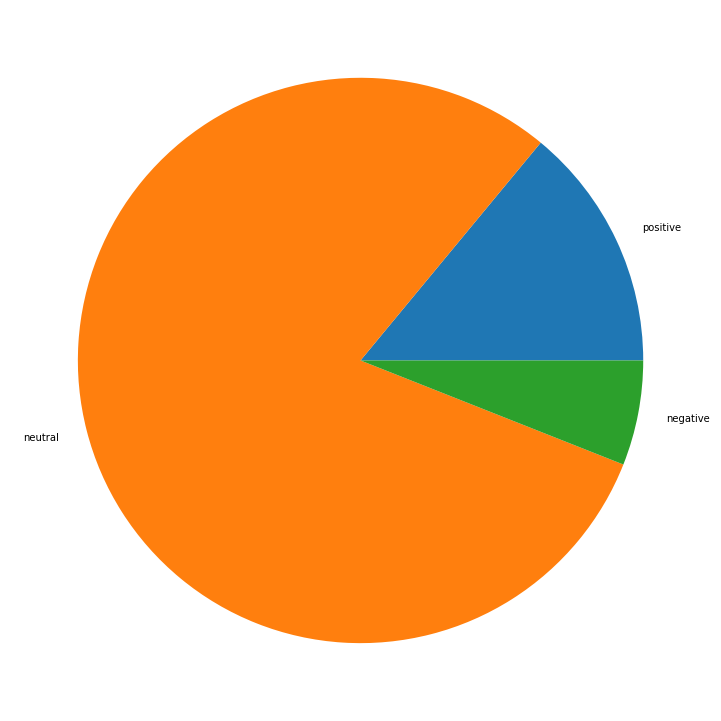

In [9]:
chart = np.array([int(p_perc), 100 - p_perc - n_perc, int(n_perc)])
chartLabels = ["positive", "neutral", "negative"]
plt.figure(figsize=(13, 13))
plt.pie(chart, labels = chartLabels)

plt.show()